<a href="https://colab.research.google.com/github/priyagupta9/Priya1430/blob/main/_Credit_Card_Fraud_Detection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR
from sklearn.metrics import confusion_matrix , accuracy_score, classification_report, plot_confusion_matrix
import warnings
warnings.filterwarnings('ignore')
# from pylab import rcParams
# rcParams['figure.figsize'] = 14, 8
# RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]
from sklearn.preprocessing import StandardScaler

In [7]:
credit_card_data = pd.read_csv('creditcard.csv')

In [8]:
credit_card_data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
# checking number of missing values:
credit_card_data.isnull().values.any()

False

In [11]:
credit_card_data.drop_duplicates(inplace=True)

In [12]:
# distribution of Normal transaction or Fraud transaction:
credit_card_data['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

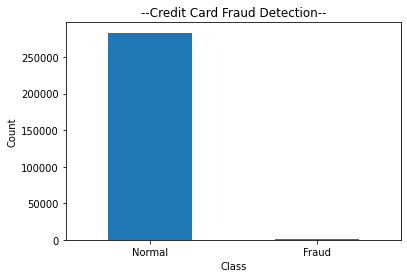

In [13]:
#visualize the data:
labels = ["Normal", "Fraud"]
count_classes = credit_card_data.value_counts(credit_card_data['Class'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("--Credit Card Fraud Detection--")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

In [14]:
# Separating the data:
normal = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [15]:
# check shape
print(normal.shape)
print(fraud.shape)

(283253, 31)
(473, 31)


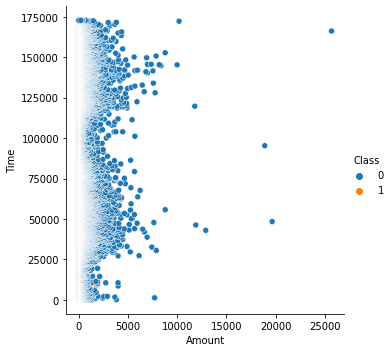

In [16]:
# statistical measures of the data:
normal.Amount.describe()
fraud.Amount.describe()

# visualize the data using seaborn:
sns.relplot(x = 'Amount' , y = 'Time' , hue = 'Class', data = credit_card_data)

In [17]:
# Splitting data into features and targets
X = credit_card_data.drop('Class', axis=1)
Y = credit_card_data['Class']

# Train - Test Split:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25, stratify = Y, random_state= 2)

print("X: ",X.shape)
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

X:  (283726, 30)
Shape of X_train:  (212794, 30)
Shape of X_test:  (70932, 30)


In [18]:
# standard scaler
stdsc = StandardScaler()
X_train = stdsc.fit_transform(X_train)
X_test = stdsc.transform(X_test)

In [19]:
model = LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [20]:
# accuracy on test data:
Y_pred_lr = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_pred_lr, Y_test)
print('Accuracy of Testing data:', test_data_accuracy)

Accuracy of Testing data: 0.9991259234196131


In [21]:
# confusion matrix
confusion_matrix_lr=confusion_matrix(Y_pred_lr, Y_test)
print("confusion Matrix (Logistic regression): \n", confusion_matrix_lr)

confusion Matrix (Logistic regression): 
 [[70799    47]
 [   15    71]]


In [22]:
print(classification_report(Y_pred_lr, Y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70846
           1       0.60      0.83      0.70        86

    accuracy                           1.00     70932
   macro avg       0.80      0.91      0.85     70932
weighted avg       1.00      1.00      1.00     70932



--------------Decision Tree-----------------------

In [23]:
DT = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
DT.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [24]:
Y_pred_DT = DT.predict(X_test)
print(Y_pred_DT)

[0 0 1 ... 0 0 0]


In [25]:
# accuracy on test data:
Y_pred_DT = model.predict(X_test)
print('Accuracy of Testing data:', accuracy_score(Y_pred_DT, Y_test))

Accuracy of Testing data: 0.9991259234196131


In [26]:
print("confusion Matrix (Decision Tree): \n", confusion_matrix(Y_test, Y_pred_DT))


confusion Matrix (Decision Tree): 
 [[70799    15]
 [   47    71]]


In [27]:
print(classification_report(Y_pred_DT, Y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70846
           1       0.60      0.83      0.70        86

    accuracy                           1.00     70932
   macro avg       0.80      0.91      0.85     70932
weighted avg       1.00      1.00      1.00     70932



Support Vector machine

In [4]:
svm = SVC()
svm.fit(X_train, Y_train)

NameError: ignored

In [ ]:
Y_pred_svm = svm.predict(X_test)
print(Y_pred_svm)

In [ ]:
Y_pred_svm = model.predict(X_test)
print('Accuracy of Testing data:', accuracy_score(Y_pred_svm, Y_test))